In [2]:
import numpy as np
import copy,math
import matplotlib.pyplot as plt

### sample dataset

In [3]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

### calculate sigmoid

In [4]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

### compute cost

In [5]:
def compute_cost_function(x,y,w,b):
    m = x.shape[0]
    total_cost = 0

    for i in range(m):
        z = np.dot(x[i],w)+b
        f_wb_i = sigmoid(z)
        total_cost += (-y[i]*np.log(f_wb_i) -(1-y[i])*np.log(1-f_wb_i))

    total_cost = total_cost/m

    return total_cost

In [6]:
compute_cost_function(X_train,y_train,w_tmp,b_tmp)

NameError: name 'w_tmp' is not defined

### compute gradient

In [71]:
def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_w  = np.zeros((n,))
    dj_b = 0.

    for i in range(m):
        fwb_i = sigmoid(np.dot(x[i],w)+b)
        err = fwb_i - y[i]
        for j in range(n):
            dj_w[j] = dj_w[j] + err*x[i,j]

        dj_b += err
    dj_w = dj_w/m
    dj_b = dj_b/m

    return dj_w, dj_b

### compute gradient descent

In [72]:
def compute_gradient_descent(x,y,w_in,b_in,alpha,num_itr):

    j_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_itr):
        dj_w, dj_b = compute_gradient(x,y,w,b)
        w = w - alpha*dj_w
        b = b - alpha*dj_b

        if num_itr < 100000:
            j_history.append(compute_cost_function(x, y, w, b))

        if i%math.ceil(num_itr/10) == 0:
            print(f'Iteration {i}: {j_history[-1]} ')

    return w, b



In [73]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w, b = compute_gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f'w = {w}')
print(f'b = {b}')

Iteration 0: 0.684610468560574 
Iteration 1000: 0.1590977666870457 
Iteration 2000: 0.08460064176930078 
Iteration 3000: 0.05705327279402531 
Iteration 4000: 0.04290759421682 
Iteration 5000: 0.03433847729884557 
Iteration 6000: 0.02860379802212006 
Iteration 7000: 0.02450156960879306 
Iteration 8000: 0.02142370332569295 
Iteration 9000: 0.019030137124109114 
w = [5.28123029 5.07815608]
b = -14.222409982019837


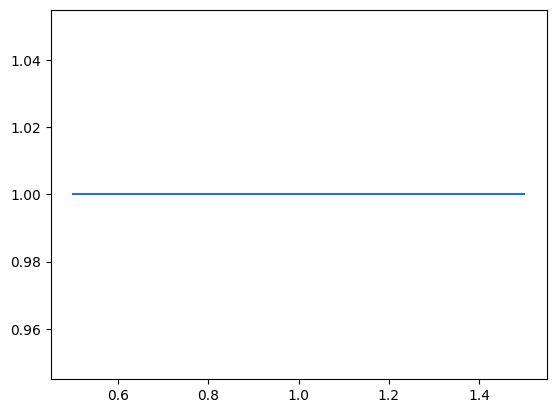

In [75]:
plt.plot(X_train[0],X_train[1])
plt.show()